In [1]:
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx

In [2]:
groups = [100, 100]

In [3]:
M = [[0.3, 0.03], 
     [0.03, 0.3]]

In [4]:
g = nx.stochastic_block_model(groups, M)

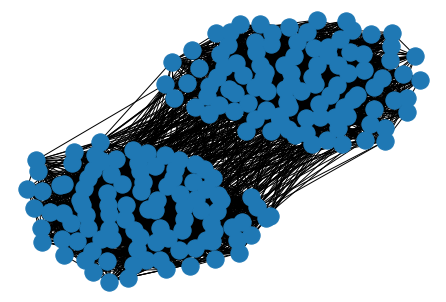

In [5]:
nx.draw(g)

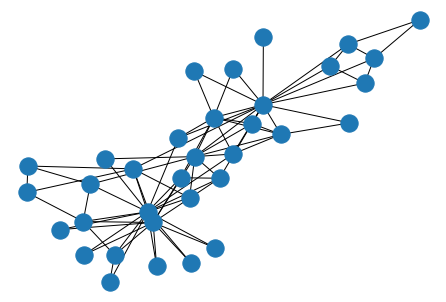

In [7]:
g = nx.karate_club_graph()
nx.draw(g)
#how do you partion this graph?

#Stochasitc block model requires you to supply partion of nodes. 

In [8]:
g.nodes(data='club')

NodeDataView({0: 'Mr. Hi', 1: 'Mr. Hi', 2: 'Mr. Hi', 3: 'Mr. Hi', 4: 'Mr. Hi', 5: 'Mr. Hi', 6: 'Mr. Hi', 7: 'Mr. Hi', 8: 'Mr. Hi', 9: 'Officer', 10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer', 16: 'Mr. Hi', 17: 'Mr. Hi', 18: 'Officer', 19: 'Mr. Hi', 20: 'Officer', 21: 'Mr. Hi', 22: 'Officer', 23: 'Officer', 24: 'Officer', 25: 'Officer', 26: 'Officer', 27: 'Officer', 28: 'Officer', 29: 'Officer', 30: 'Officer', 31: 'Officer', 32: 'Officer', 33: 'Officer'}, data='club')

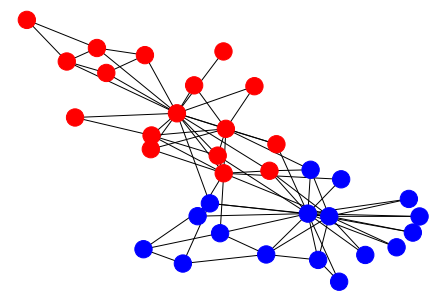

In [11]:
club = g.nodes(data='club')
nx.draw(g, node_color = ['r' if club[i] == 'Mr. Hi' else 'b' for i in g.nodes])

In [12]:
qg = nx.quotient_graph(g, [[i for i in g.nodes if club[i] == 'Mr. Hi'], 
                          [i for i in g.nodes if club[i] == 'Officer']])

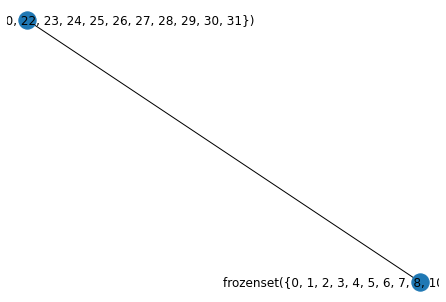

In [15]:
#Reduce initial graph into a simpler graph.
nx.draw(qg, with_labels=True)

In [17]:
qg.nodes

NodeView((frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21}), frozenset({32, 33, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31})))

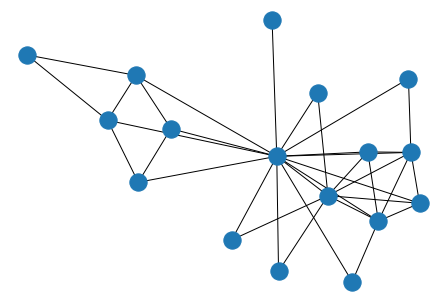

In [23]:
nx.draw(qg.nodes[(frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21}))]['graph'])

In [24]:
qg.nodes[(frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21}))]

{'graph': <networkx.classes.graph.Graph at 0x7f93e00c21f0>,
 'nnodes': 17,
 'nedges': 35,
 'density': 0.25735294117647056}

In [25]:
qg.nodes[frozenset({32, 33, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31})]

{'graph': <networkx.classes.graph.Graph at 0x7f93e00c25b0>,
 'nnodes': 17,
 'nedges': 32,
 'density': 0.23529411764705882}

In [28]:
qg.edges

EdgeView([(frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21}), frozenset({32, 33, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}))])

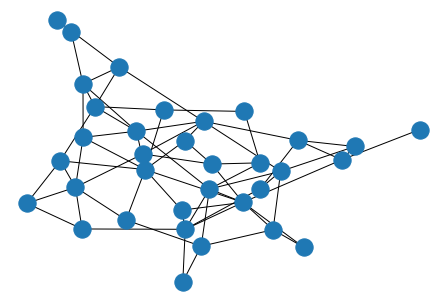

In [34]:
M = [[0.25735294117647056, 11/(17**2)], 
          [11/(17**2), 0.23529411764705882]]

# 11/17**2 => total number of edges / total possible number of edges.

groups = [17, 17]
qg2 = nx.stochastic_block_model(groups, M)
nx.draw(qg2) #is this a good model? This is the expected model from the original network.
# One way to summarize topology of an initial model. 

### Watts-Strogatz Degree Distribution

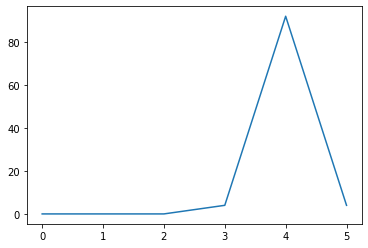

In [39]:
ws = nx.watts_strogatz_graph(100, 4, 0.01)
h = nx.degree_histogram(ws)
plt.plot(h)
plt.show()
#This is just a peak, not really a distribution.
# The small-world model is good, but not a great model and not motivated by real-world data.

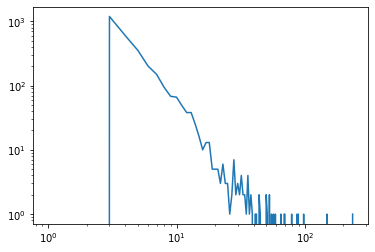

In [45]:
ba = nx.barabasi_albert_graph(3000, 3) #Number of connections each new node connects to.
plt.loglog(nx.degree_histogram(ba))
plt.show()

#Focused on the incremental growth model. 


### Degree Correlation (degree assortativity)

In [46]:
g = nx.karate_club_graph()
nx.degree_assortativity_coefficient(g) # Pearson correlation coef. Neg. means that it's neg. correlated. 
# Popular people are hanging out with not popular people.
# Structural cutoff. 

-0.47561309768461457

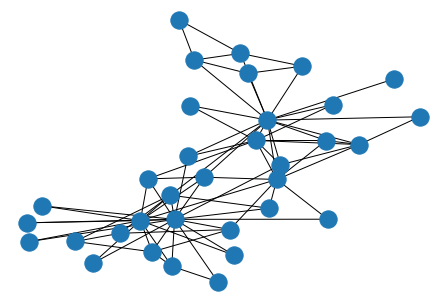

In [48]:
nx.draw(g)

In [66]:
def sample():
    g2 = nx.configuration_model(dict(g.degree()).values())
    return nx.degree_assortativity_coefficient(g2)

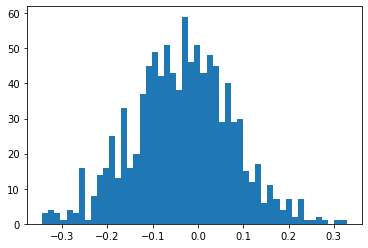

In [72]:
plt.hist([sample() for i in range(1000)], bins=50)
plt.show()
# The coef is negative which means that popular people hangout with non-popular people.
# THis is the nature of this network.

In [75]:
g = nx.barabasi_albert_graph(1000, 3)
nx.degree_assortativity_coefficient(g)

-0.06394145336038323

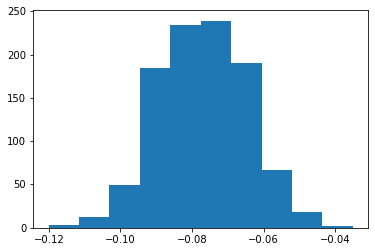

In [76]:
def sample():
    g = nx.barabasi_albert_graph(1000, 3)
    return nx.degree_assortativity_coefficient(g)
plt.hist([sample() for i in range(1000)])
plt.show()

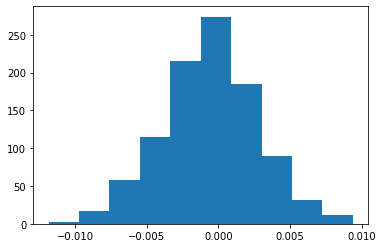

In [77]:
def sample():
    g = nx.erdos_renyi_graph(3000, 0.02)
    return nx.degree_assortativity_coefficient(g)
plt.hist([sample() for i in range(1000)])
plt.show()

In [ ]:
#Phys Rev Lett, 89, 208701
#Why are social networks assorative but engineerded/biological netowrks are disassortative. 